#### Import `pandas` library in order to read and visualize the csv file.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../DataSets/Listado_de_localidades_con_conectividad_a_internet.csv', sep = ',')

#### Inspect the first five rows of the DataFrame

In [3]:
df.head()

,Provincia,Partido,Localidad,ADSL,Cablemódem,Dial Up,Fibra óptica,4G,3G,Telefonía Fija,Wireless,Satelital
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),SI,--,--,--,SI,SI,SI,--,--
1,BUENOS AIRES,9 de Julio,Carlos María Naón,--,--,--,--,SI,SI,SI,--,--
2,BUENOS AIRES,9 de Julio,Dudignac,--,--,SI,--,SI,SI,SI,SI,--
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),--,--,--,--,SI,--,--,--,--
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),SI,--,--,SI,SI,SI,SI,--,--


#### Replace the old values with True or False values

In [4]:
df['ADSL'].replace(('--', 'SI'), (False, True), inplace = True)
df['Cablemódem'].replace(('--', 'SI'), (False, True), inplace = True)
df['Dial Up'].replace(('--', 'SI'), (False, True), inplace = True)
df['Fibra óptica'].replace(('--', 'SI'), (False, True), inplace = True)
df['4G'].replace(('--', 'SI'), (False, True), inplace = True)
df['3G'].replace(('--', 'SI'), (False, True), inplace = True)
df['Telefonía Fija'].replace(('--', 'SI'), (False, True), inplace = True)
df['Wireless'].replace(('--', 'SI'), (False, True), inplace = True)
df['Satelital'].replace(('--', 'SI'), (False, True), inplace = True)

#### Check the DataFrame

In [5]:
df['Wireless'] = df['Wireless'].astype('int8')

#### Check the column data type

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4311 entries, 0 to 4310
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provincia       4311 non-null   object
 1   Partido         4311 non-null   object
 2   Localidad       4311 non-null   object
 3   ADSL            4311 non-null   bool  
 4   Cablemódem      4311 non-null   bool  
 5   Dial Up         4311 non-null   bool  
 6   Fibra óptica    4311 non-null   bool  
 7   4G              4311 non-null   bool  
 8   3G              4311 non-null   bool  
 9   Telefonía Fija  4311 non-null   bool  
 10  Wireless        4311 non-null   int8  
 11  Satelital       4311 non-null   bool  
dtypes: bool(8), int8(1), object(3)
memory usage: 139.1+ KB


#### Proceed to change the column data type

In [7]:
df['Provincia'] = df['Provincia'].astype('category')
df['Partido'] = df['Partido'].astype('category')
df['Localidad'] = df['Localidad'].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4311 entries, 0 to 4310
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Provincia       4311 non-null   category
 1   Partido         4311 non-null   category
 2   Localidad       4311 non-null   category
 3   ADSL            4311 non-null   bool    
 4   Cablemódem      4311 non-null   bool    
 5   Dial Up         4311 non-null   bool    
 6   Fibra óptica    4311 non-null   bool    
 7   4G              4311 non-null   bool    
 8   3G              4311 non-null   bool    
 9   Telefonía Fija  4311 non-null   bool    
 10  Wireless        4311 non-null   int8    
 11  Satelital       4311 non-null   bool    
dtypes: bool(8), category(3), int8(1)
memory usage: 239.0 KB


### See the number of cities by province

In [9]:
df['Provincia'].value_counts()

Provincia
BUENOS AIRES           901
CORDOBA                556
SANTA FE               388
SAN LUIS               229
MENDOZA                210
ENTRE RIOS             194
CATAMARCA              182
SANTIAGO DEL ESTERO    165
RIO NEGRO              162
JUJUY                  160
MISIONES               143
SALTA                  139
TUCUMAN                117
SAN JUAN               108
LA RIOJA                93
CHACO                   92
CHUBUT                  90
LA PAMPA                89
CORRIENTES              78
FORMOSA                 63
NEUQUEN                 61
CABA                    48
SANTA CRUZ              27
TIERRA DEL FUEGO        16
Name: count, dtype: int64

## Import libraries to plot some data

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

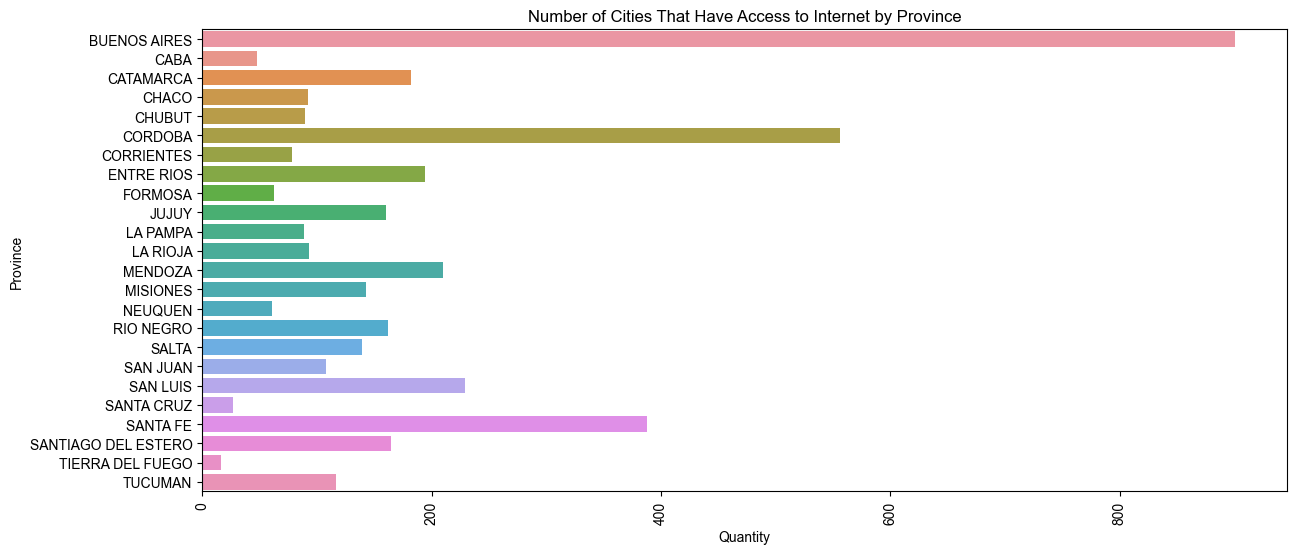

In [11]:
plt.figure(figsize = (14, 6))
sns.countplot(data = df, y = 'Provincia')
plt.grid(axis = 'y', which = 'minor')
sns.set_style('whitegrid', { 'grid.linestyle': '-.'})
plt.xticks(rotation = 90)
plt.title(('Number of Cities That Have Access to Internet by Province'))
plt.ylabel('Province')
plt.xlabel('Quantity')
plt.show()

As we can see, Buenos Aires is the province with the most cities with Internet access as opposed to Tierra Del Fuego.
These values are 901 and 16, respectively.

### How many cities out of the 4311, have wireless connection

In [12]:
df['Wireless'].value_counts()

Wireless
1    2224
0    2087
Name: count, dtype: int64

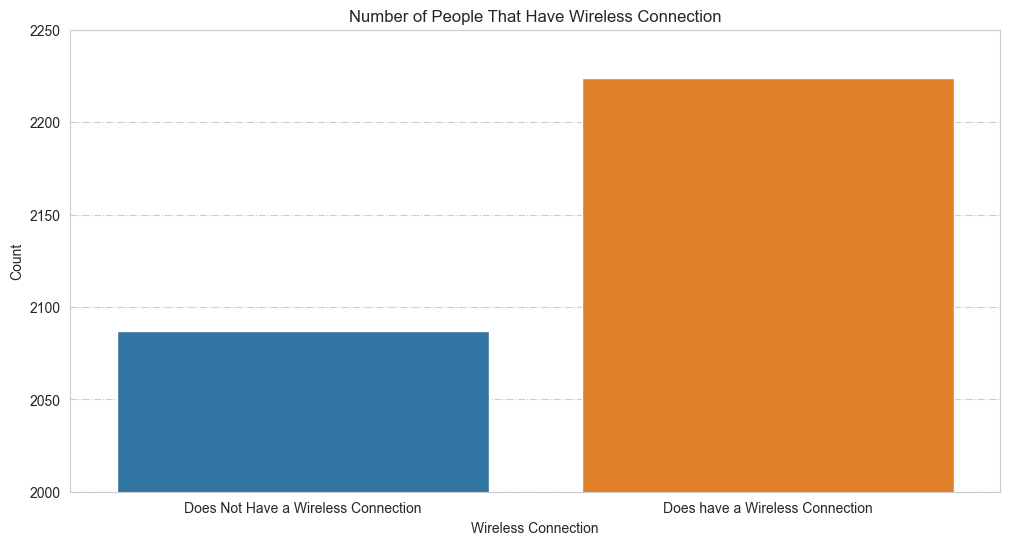

In [13]:
plt.figure(figsize= (12,6))
sns.countplot(data = df, x = 'Wireless')
plt.xticks([0, 1], ['Does Not Have a Wireless Connection', 'Does have a Wireless Connection'])
plt.title('Number of People That Have Wireless Connection')
plt.ylabel('Count')
plt.xlabel('Wireless Connection')
plt.ylim(2000, 2250)
plt.show()

## As we see, there are many cities with no WiFi connection that could be exploited.
___
___


### `Load a second csv file to have a better understanding of the data`

In [14]:
df2 = pd.read_csv('../DataSets/Internet_Penetracion_cada_100_hogares.csv', sep = ',')

In [15]:
df2

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,2022,4,Buenos Aires,"78,94",NaN,NaN,NaN
1,2022,4,Capital Federal,"122,73",NaN,NaN,NaN
2,2022,4,Catamarca,"65,77",NaN,NaN,NaN
3,2022,4,Chaco,"43,62",NaN,NaN,NaN
4,2022,4,Chubut,"85,57",NaN,NaN,NaN
...,...,...,...,...,...,...,...
859,2014,1,Santa Cruz,"28,94",NaN,NaN,NaN
860,2014,1,Santa Fe,"47,85",NaN,NaN,NaN
861,2014,1,Santiago Del Estero,"16,31",NaN,NaN,NaN
862,2014,1,Tierra Del Fuego,"63,97",NaN,NaN,NaN


### Get rid of the last three columns that have no values

In [16]:
df2['Unnamed: 4'].isnull().sum(), df2['Unnamed: 5'].isnull().sum(), df2['Unnamed: 6'].isnull().sum()

(864, 864, 864)

In [17]:
df2.drop(['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'], axis = 1, inplace = True)

In [18]:
df2

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,Buenos Aires,"78,94"
1,2022,4,Capital Federal,"122,73"
2,2022,4,Catamarca,"65,77"
3,2022,4,Chaco,"43,62"
4,2022,4,Chubut,"85,57"
...,...,...,...,...
859,2014,1,Santa Cruz,"28,94"
860,2014,1,Santa Fe,"47,85"
861,2014,1,Santiago Del Estero,"16,31"
862,2014,1,Tierra Del Fuego,"63,97"


### Get more insight of the DataFrame

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           864 non-null    int64 
 1   Trimestre                     864 non-null    int64 
 2   Provincia                     864 non-null    object
 3   Accesos por cada 100 hogares  864 non-null    object
dtypes: int64(2), object(2)
memory usage: 27.1+ KB


### To be able to convert the columns' data type, we first need to replace the '`,`' notation for the '`.`' notation

In [20]:
df2['Accesos por cada 100 hogares'].replace(',', '.', regex = True, inplace = True)

In [21]:
df2['Año'] = df2['Año'].astype('int16')
df2['Trimestre'] = df2['Trimestre'].astype('int8')
df2['Provincia'] = df2['Provincia'].astype('category')
df2['Accesos por cada 100 hogares'] = df2['Accesos por cada 100 hogares'].astype('float')

### Check the final version of the DataFrame

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Año                           864 non-null    int16   
 1   Trimestre                     864 non-null    int8    
 2   Provincia                     864 non-null    category
 3   Accesos por cada 100 hogares  864 non-null    float64 
dtypes: category(1), float64(1), int16(1), int8(1)
memory usage: 11.0 KB


In [23]:
df2.describe()

,Año,Trimestre,Accesos por cada 100 hogares
count,864.000000,864.000000,864.000000
mean,2018.000000,2.500000,49.620301
std,2.583484,1.118682,23.319150
min,2014.000000,1.000000,9.350000
25%,2016.000000,1.750000,32.220000
50%,2018.000000,2.500000,46.390000
75%,2020.000000,3.250000,62.442500
max,2022.000000,4.000000,124.060000


### Some values in '**`Accesos por cada 100 hogares`**' are higher than 100, this could mean that there are households with more than one connection, or these are anomalies. Either way, we get rid of these in order to have a more binary column. 

#### We drop the rows with values higher than 100 and reset the index

In [24]:
df2 = (df2[df2['Accesos por cada 100 hogares'] <= 100])

In [25]:
byYear = df2.groupby('Provincia')['Accesos por cada 100 hogares'].mean().sort_values(ascending = False)
byYear

Provincia
Tierra Del Fuego       78.151714
La Pampa               71.277222
Córdoba                66.986111
Buenos Aires           63.979444
Santa Fe               62.836667
Neuquén                62.373889
Río Negro              53.567500
Chubut                 53.114444
Entre Ríos             51.164444
San Luis               44.339722
Tucumán                44.124167
La Rioja               42.564444
Salta                  41.886667
Mendoza                37.265000
Catamarca              36.737500
Jujuy                  35.920000
Corrientes             35.597778
Misiones               35.512222
San Juan               33.618333
Chaco                  33.472778
Santa Cruz             32.937778
Santiago Del Estero    32.591944
Formosa                26.581389
Capital Federal              NaN
Name: Accesos por cada 100 hogares, dtype: float64

### We see that, `Tierra Del Fuego`, despite being one of the least populated provinces is the one with the highest percentaje of Internet access.

#### Drop `Capital Federal` which has no values

In [26]:
byYear.drop(labels = 'Capital Federal', inplace = True)

In [27]:
byYear

Provincia
Tierra Del Fuego       78.151714
La Pampa               71.277222
Córdoba                66.986111
Buenos Aires           63.979444
Santa Fe               62.836667
Neuquén                62.373889
Río Negro              53.567500
Chubut                 53.114444
Entre Ríos             51.164444
San Luis               44.339722
Tucumán                44.124167
La Rioja               42.564444
Salta                  41.886667
Mendoza                37.265000
Catamarca              36.737500
Jujuy                  35.920000
Corrientes             35.597778
Misiones               35.512222
San Juan               33.618333
Chaco                  33.472778
Santa Cruz             32.937778
Santiago Del Estero    32.591944
Formosa                26.581389
Name: Accesos por cada 100 hogares, dtype: float64

### Proceed to plot the Average Internet Access per 100 Inhabitants by province

In [28]:
df2 = df2.sort_values(by = 'Trimestre', ascending = True)

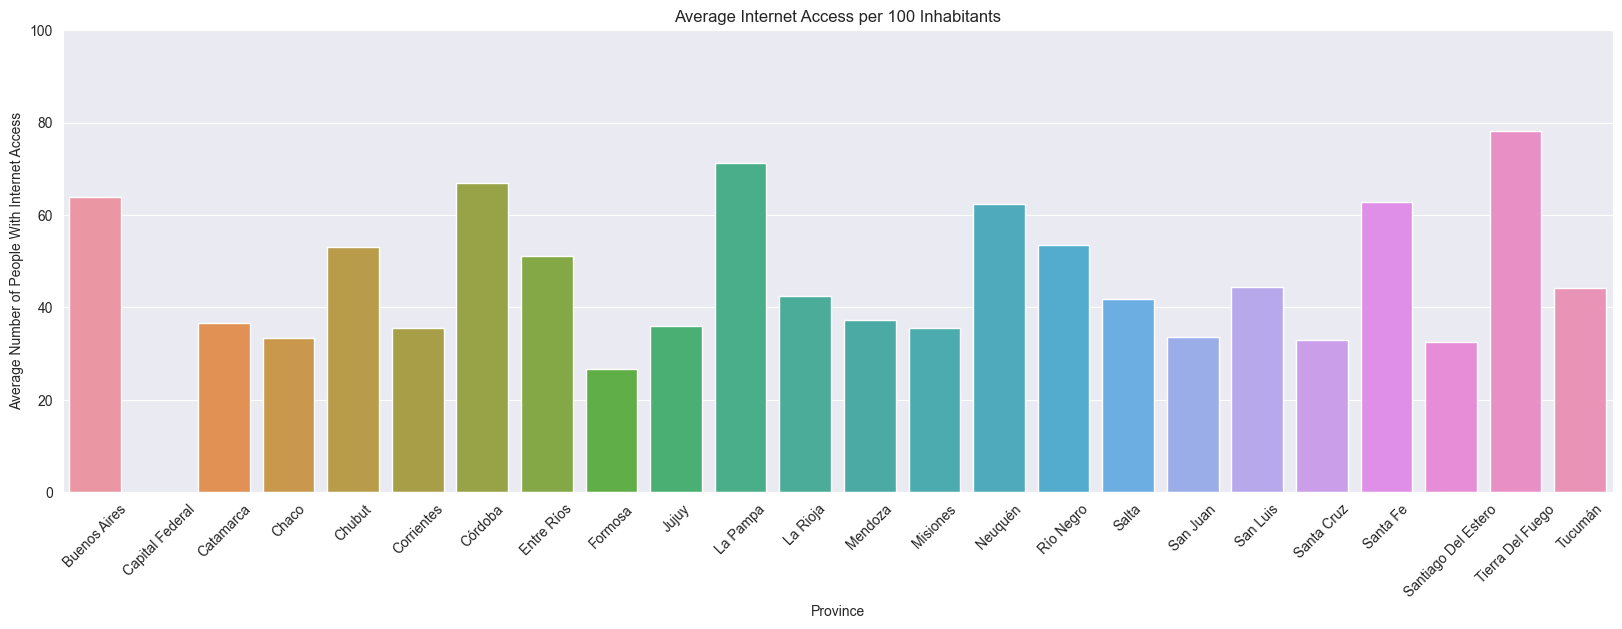

In [29]:
plt.figure(figsize = (20, 6))
sns.set_style('darkgrid')
sns.barplot(x = byYear.index, y = byYear.values)

plt.xticks(rotation = 45)
plt.title('Average Internet Access per 100 Inhabitants')
plt.xlabel('Province')
plt.ylabel('Average Number of People With Internet Access')
plt.ylim((0, 100))
plt.show()

### We change the data type of the `Trimestre` column so that we can use it as *hue*

In [30]:
df2['Trimestre'] = df2['Trimestre'].astype('string')

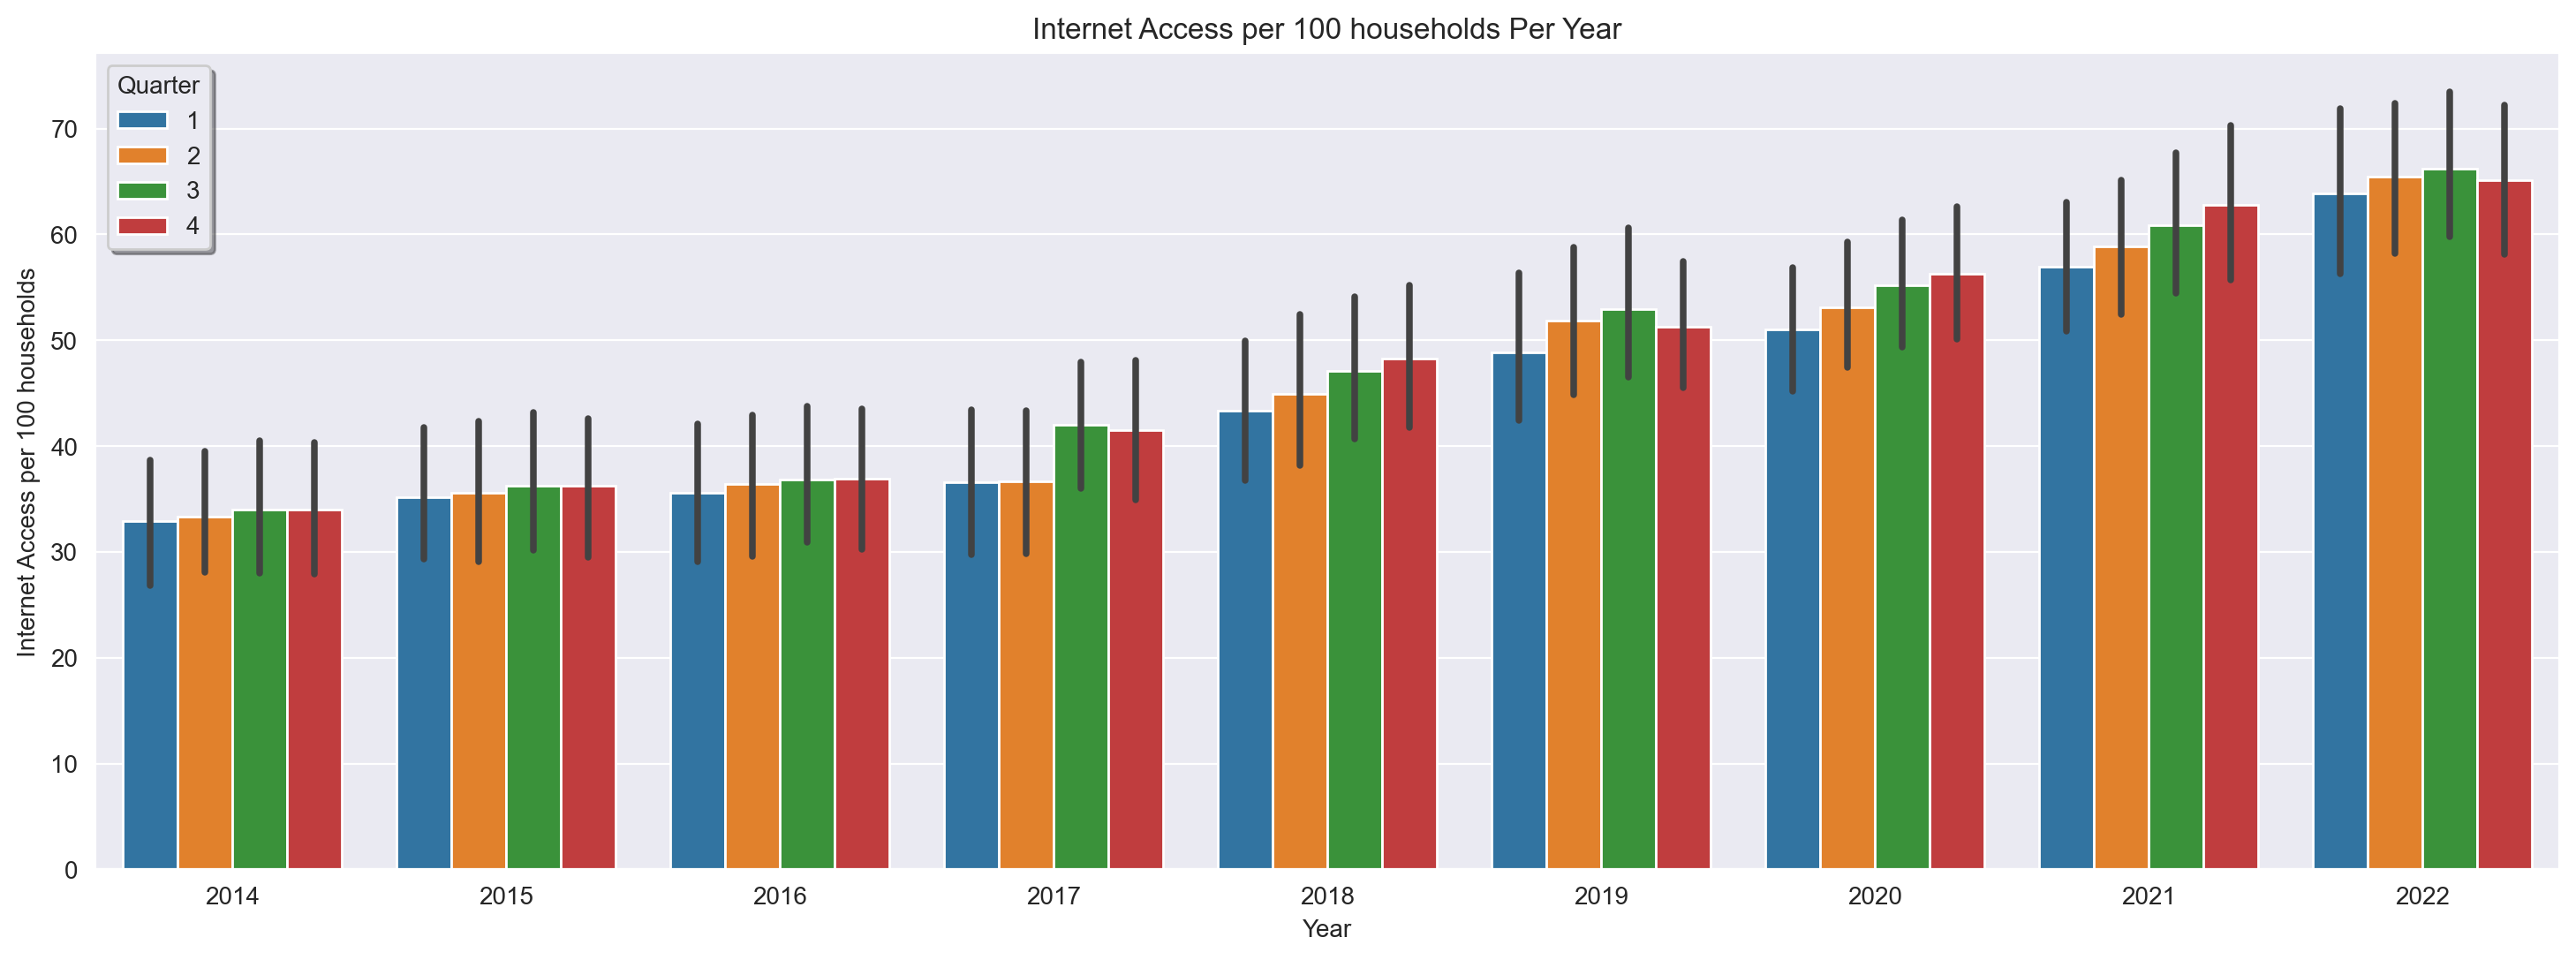

In [31]:
plt.figure(figsize = (18, 6), dpi = 200.0)
sns.barplot(df2, x =  'Año', y = 'Accesos por cada 100 hogares', hue = 'Trimestre')
plt.legend(title = 'Quarter', shadow = True, loc = 'best')
plt.ylabel('Internet Access per 100 households')
plt.xlabel('Year')
plt.title('Internet Access per 100 households Per Year')
plt.show()

### As we can see, there is a trend of increasing Internet access, especially in the last quarter of each year. However, in the last year, we see a minor drop same as in 2019
___
___

## **``Final Key Takeaways``**

 - ### Buenos Aires has the highest number of cities with Internet access
 - ### Tierra del Fuego has the highest rate of Internet connection compared to the rest of the country
 - ### Almost half the cities in Argentina do not have wireless connection
 - ### The country has seen a steady growth in Internet connection in recent years 